In [30]:
import nltk 

In [31]:
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem import *
from nltk.stem.porter import PorterStemmer
import operator
import re
import string
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0) 



In [32]:
imdb = ""
amazon = ""
yelp = ""

In [33]:
with open ('imdb_labelled.txt') as f:
    imdb = f.read()
with open ('amazon_cells_labelled.txt') as f:
    amazon = f.read()
with open ('yelp_labelled.txt') as f:
    yelp = f.read()

imdb_tokens = nltk.wordpunct_tokenize(imdb)
amazon_tokens = nltk.wordpunct_tokenize(amazon)
yelp_tokens = nltk.wordpunct_tokenize(yelp)


## (used in freq dist plot) This removes puntuation and lowers the alphabets 
imdb_vocab = list(sorted((map(lambda w : (re.sub(r'[\W]', '', w)).lower(), imdb_tokens))))
amazon_vocab = list(sorted((map(lambda w : (re.sub(r'[\W]', '', w)).lower(), amazon_tokens))))
yelp_vocab = list(sorted((map(lambda w : (re.sub(r'[\W]', '', w)).lower(), yelp_tokens))))


imdb_freq = FreqDist(imdb_vocab)
amazon_freq = FreqDist(amazon_vocab)
yelp_freq = FreqDist(yelp_vocab)


tokens = (nltk.wordpunct_tokenize(imdb + amazon + yelp))
text = nltk.Text(tokens)
words = [w.lower() for w in text]
vocab = sorted(set(words))
len(vocab)



5268

In [34]:
## remove stop words 
vocab = [w for w in vocab if w not in stopwords.words('english')]
# stopwords
len(vocab)

5128

Total Words removed:

In [35]:
5268 - 5128 

140

### Removing punctuation...
Note that as the instructor suggested, I'm removing puntuation as part of preprocessing.

In [36]:
vocab = list(sorted(set(map(lambda w : re.sub(r'[\W]', '', w), vocab))))
len(vocab)

5044

### Lemmatization...

In [37]:
wnl = WordNetLemmatizer()

In [38]:
lemmatized_vocab = list(set(map(lambda w : wnl.lemmatize(w), vocab)))
len(lemmatized_vocab)


4649

### Stemming...

In [39]:
porter_stemmer = PorterStemmer()

In [40]:
stemmed_lemmatized_vocab = list(set(map(lambda w : porter_stemmer.stem(w), lemmatized_vocab)))
len(stemmed_lemmatized_vocab)

3960

### Vocab size after preprocessing is 3960; Size before preprocessing was 5268.  $Difference $:

In [41]:
5268 - 3960

1308

Note that I'm using SentimentIntensityAnalyzer for classifying words either positive or negative. 

In [42]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hamzaliaqet/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [43]:
def top_pos_neg_words(word_freq):
    imdb_positive_words = {}
    imdb_negative_words = {}
    # imdb_freq = dict(imdb_freq)
    for word,count in word_freq.items():
        if (len(imdb_negative_words) >= 10 and len(imdb_positive_words) >= 10):
            break
        if (len(word) > 1):
            sentiment = sid.polarity_scores(word)
            dom_sent = (max(sentiment.items(), key=operator.itemgetter(1))[0]) 
            if dom_sent == 'neg':
                imdb_negative_words[word] = count
            if dom_sent == 'pos':
                imdb_positive_words[word] = count
    return imdb_positive_words, imdb_negative_words


In [44]:
domains = [yelp_freq, imdb_freq, amazon_freq]

In [45]:
for word_freq in domains:
    print(top_pos_neg_words(word_freq))
    

({'amazing': 24, 'apologize': 1, 'apology': 1, 'approval': 1, 'assure': 2, 'awesome': 12, 'bargain': 1, 'beautiful': 3, 'beautifully': 1, 'beauty': 1}, {'accident': 1, 'ache': 1, 'alone': 1, 'angry': 1, 'annoying': 1, 'appalling': 1, 'attack': 2, 'avoid': 5, 'avoided': 1, 'awful': 3, 'awkward': 1, 'awkwardly': 1, 'bad': 18})
({'ability': 3, 'admiration': 1, 'admitted': 1, 'adorable': 4, 'adventure': 1, 'agree': 1, 'agreed': 1, 'alert': 1, 'allow': 1, 'amaze': 1, 'amazed': 1, 'amazing': 9, 'amusing': 1, 'applauded': 1, 'applause': 1, 'appreciate': 4}, {'abandoned': 1, 'accused': 2, 'affected': 1, 'angry': 1, 'anguish': 1, 'annoying': 6, 'appalling': 2, 'argued': 1, 'ass': 2, 'assaulted': 1})
({'ability': 2, 'accept': 2, 'acceptable': 1, 'adorable': 2, 'allow': 1, 'amazed': 2, 'amazing': 1, 'amazon': 9, 'attractive': 1, 'awesome': 5}, {'abhor': 1, 'accidentally': 2, 'aggravating': 1, 'alarm': 1, 'alone': 2, 'anti': 1, 'arguing': 1, 'attacked': 1, 'avoid': 3, 'avoiding': 1})


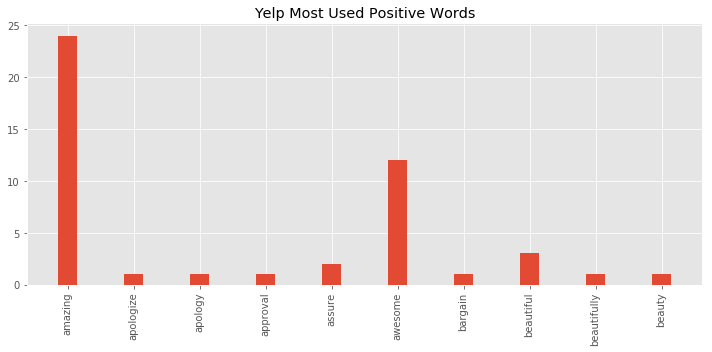

In [46]:
pos, neg = (top_pos_neg_words(yelp_freq))
plt.bar (list(pos.keys()), list(pos.values()), width = .3)
labels = (list(pos.keys()))
plt.xticks(labels, rotation='vertical')
plt.title('Yelp Most Used Positive Words', loc='center')
plt.tight_layout()

plt.show()


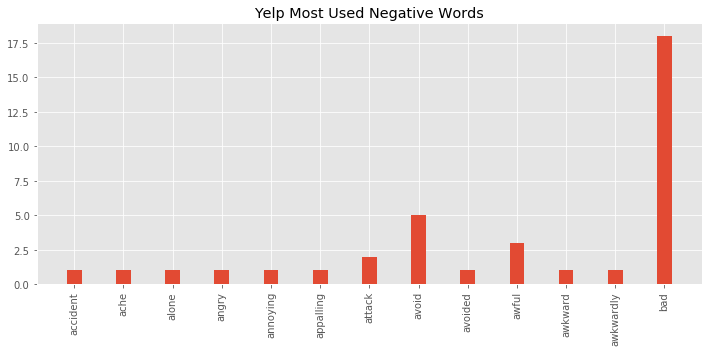

In [47]:
pos, neg = (top_pos_neg_words(yelp_freq))
plt.bar (list(neg.keys()), list(neg.values()), width = .3)
labels = (list(neg.keys()))
plt.xticks(labels, rotation='vertical')
plt.title('Yelp Most Used Negative Words', loc='center')
plt.tight_layout()
plt.show()


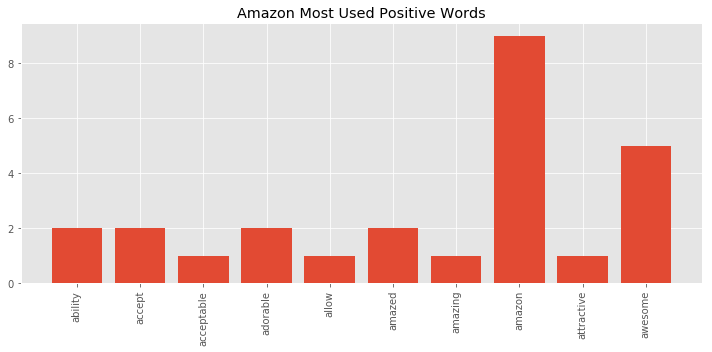

In [48]:
pos, neg = (top_pos_neg_words(amazon_freq))
plt.bar (list(pos.keys()), list(pos.values()))
labels = (list(pos.keys()))
plt.xticks(labels, rotation='vertical')
plt.title('Amazon Most Used Positive Words', loc='center')
plt.tight_layout()
plt.show()


Note that 'SentimentIntensityAnalyzer' returned 'Amazon' as positive word; however, it should appropriately be interpreted neutral. Thus, awesome is the most used positve word in 'Amazon' domain.

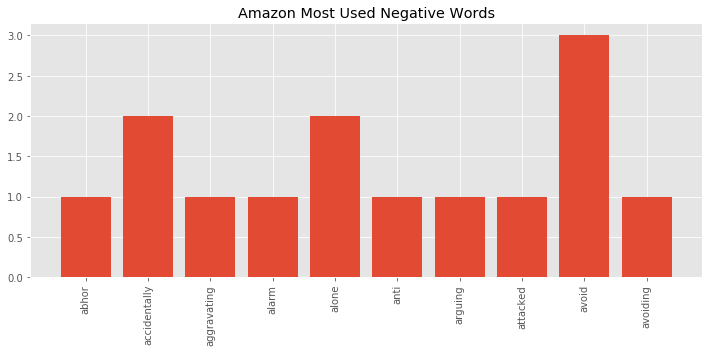

In [49]:
pos, neg = (top_pos_neg_words(amazon_freq))
plt.bar (list(neg.keys()), list(neg.values()))
labels = (list(neg.keys()))
plt.xticks(labels, rotation='vertical')
plt.title('Amazon Most Used Negative Words', loc='center')
plt.tight_layout()
plt.show()

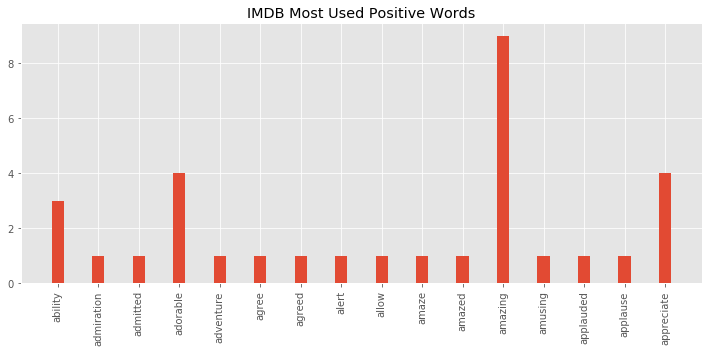

In [50]:
pos, neg = (top_pos_neg_words(imdb_freq))
plt.bar (list(pos.keys()), list(pos.values()), width = .3)
# plt.setp(get_xticklabels(), rotation=30, horizontalalignment='right')
labels = (list(pos.keys()))
plt.xticks(labels, rotation='vertical')
plt.title('IMDB Most Used Positive Words', loc='center')
plt.tight_layout()
plt.show()



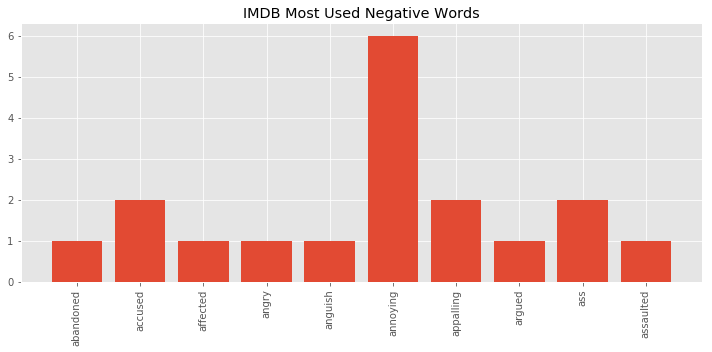

In [51]:
pos, neg = (top_pos_neg_words(imdb_freq))
plt.bar (list(neg.keys()), list(neg.values()))
labels = (list(neg.keys()))
plt.xticks(labels, rotation='vertical')
plt.title('IMDB Most Used Negative Words', loc='center')
plt.tight_layout()
plt.show()



### Conclusion:

Annoying is most used negative word in imdb, avoid in amazon, and bad in yelp domain. Amazing, awesome and amazing are most used positive words in yelp, amazon, imdb respectively. 